In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

<Axes: >

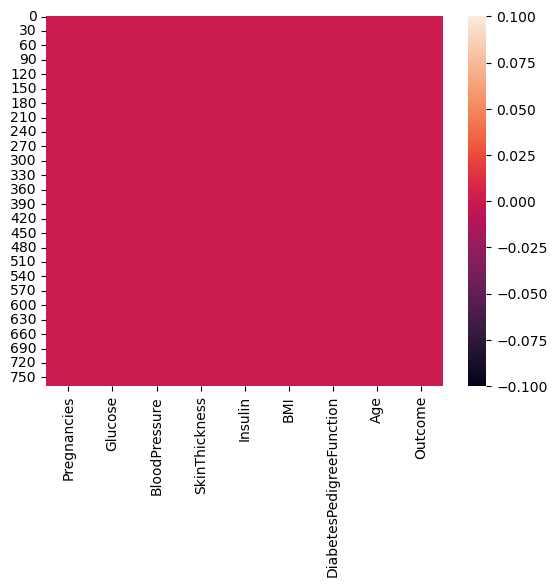

In [4]:
sns.heatmap(data.isnull())

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Type Markdown and LaTeX:  𝛼2

0-->Non-Diabetic

1--> Diabetic

In [6]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
corrdata = data.corr()

<Axes: >

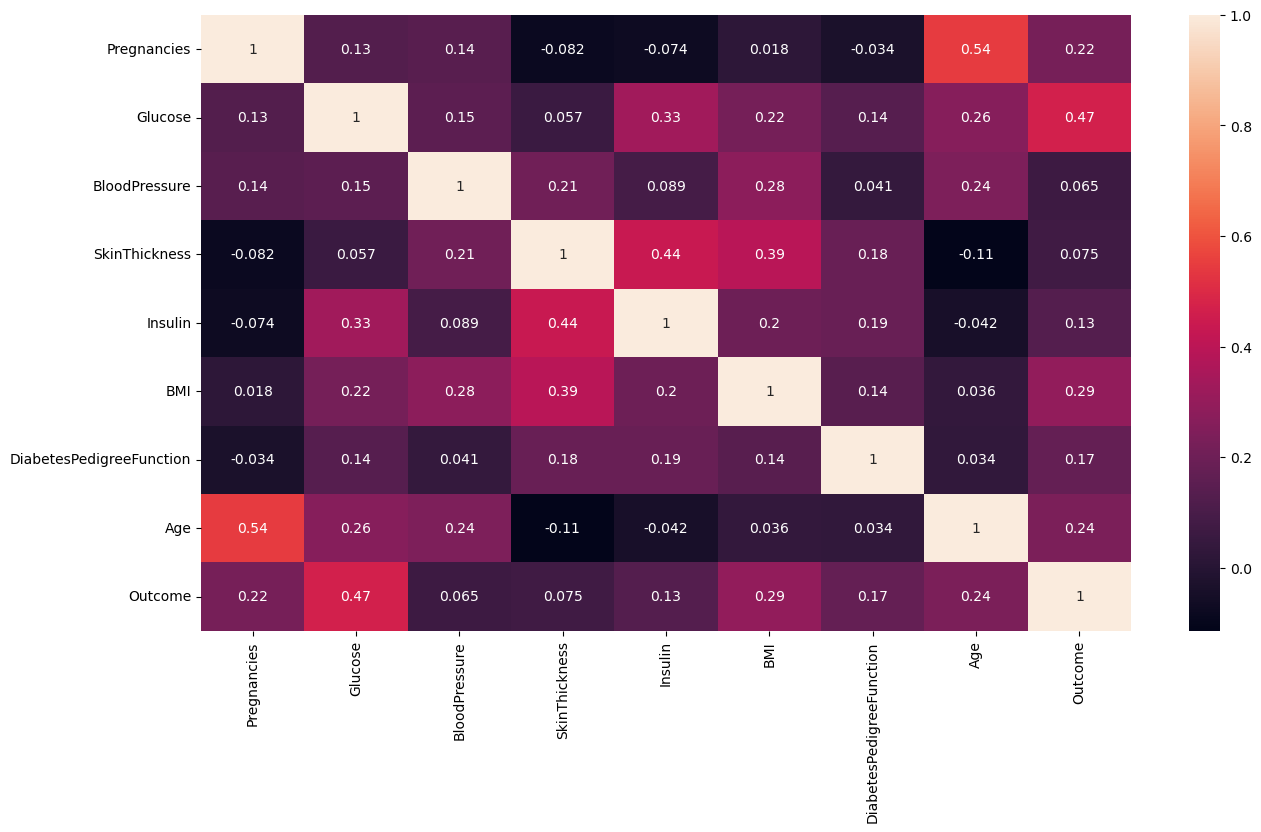

In [8]:
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

In [9]:
data=data.copy()

In [10]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


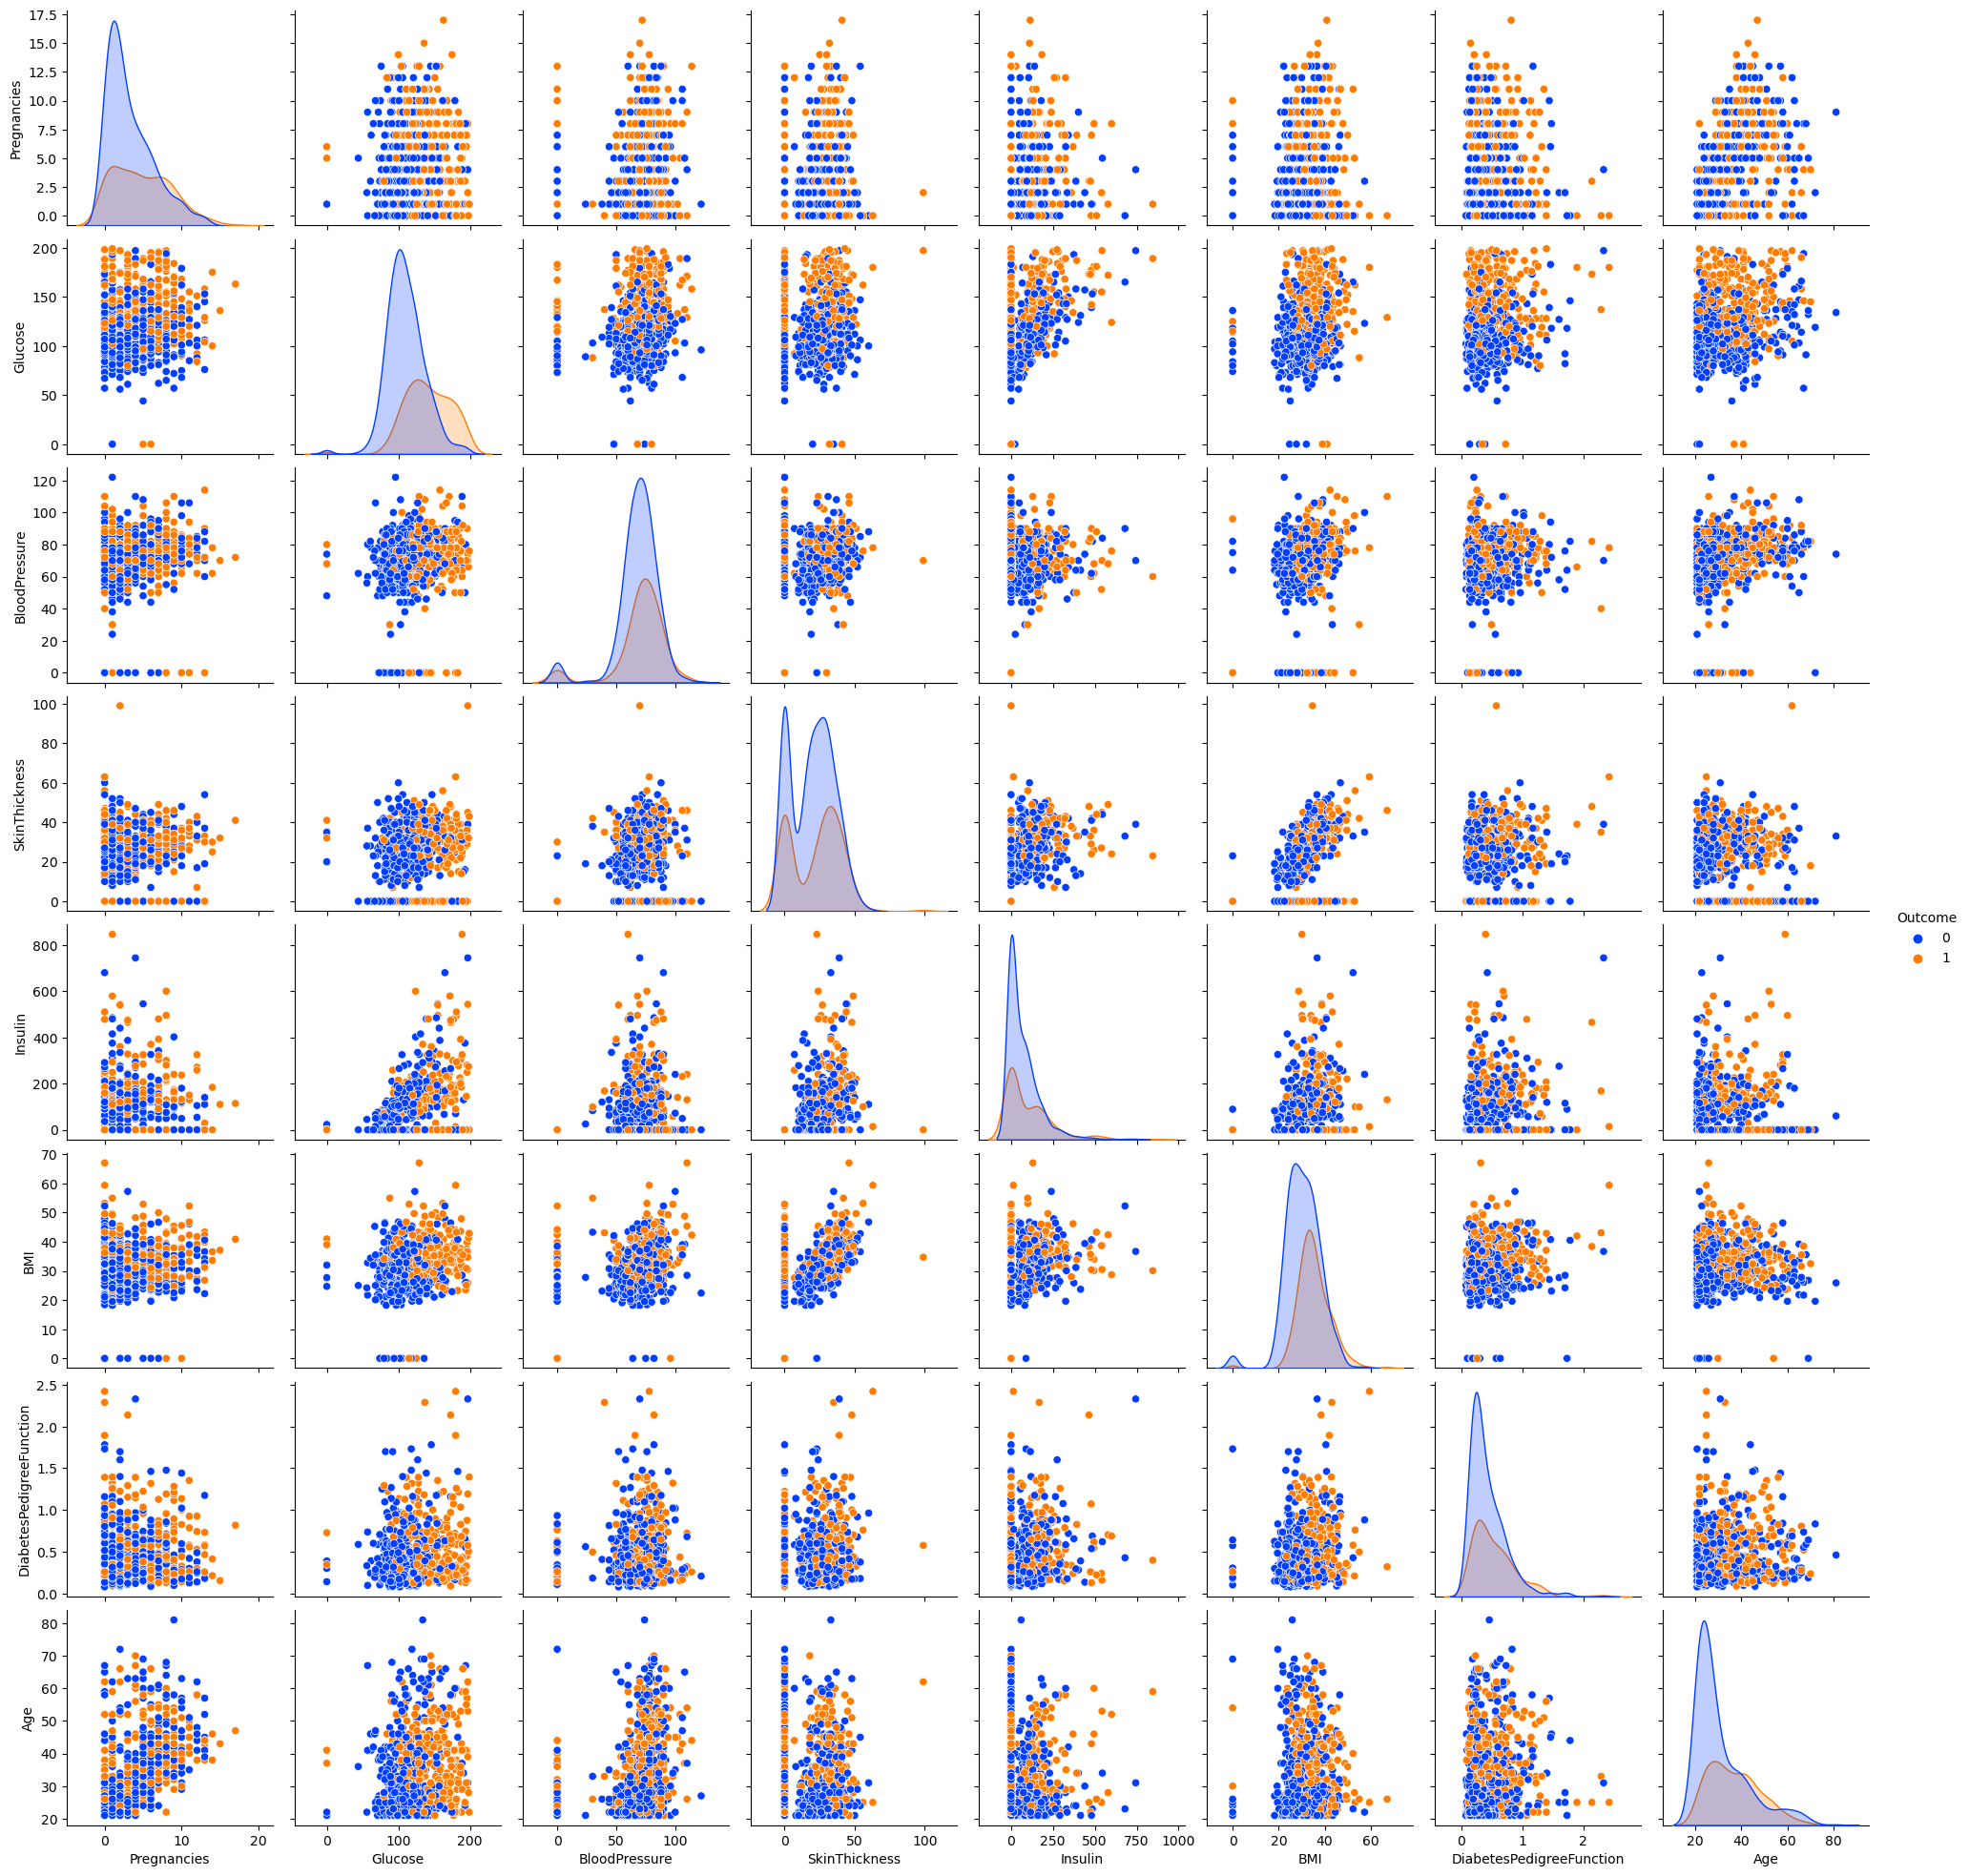

In [16]:
sns.pairplot(data=data,hue='Outcome',kind='scatter',palette='bright')

<Axes: ylabel='count'>

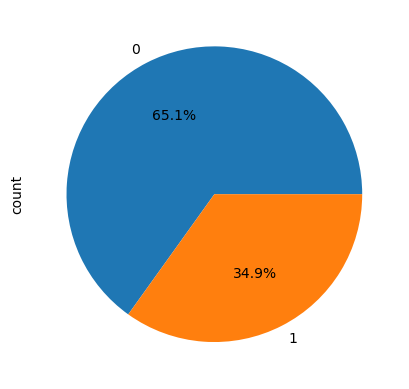

In [17]:
data["Outcome"].value_counts().plot(kind="pie", autopct="%1.1f%%")

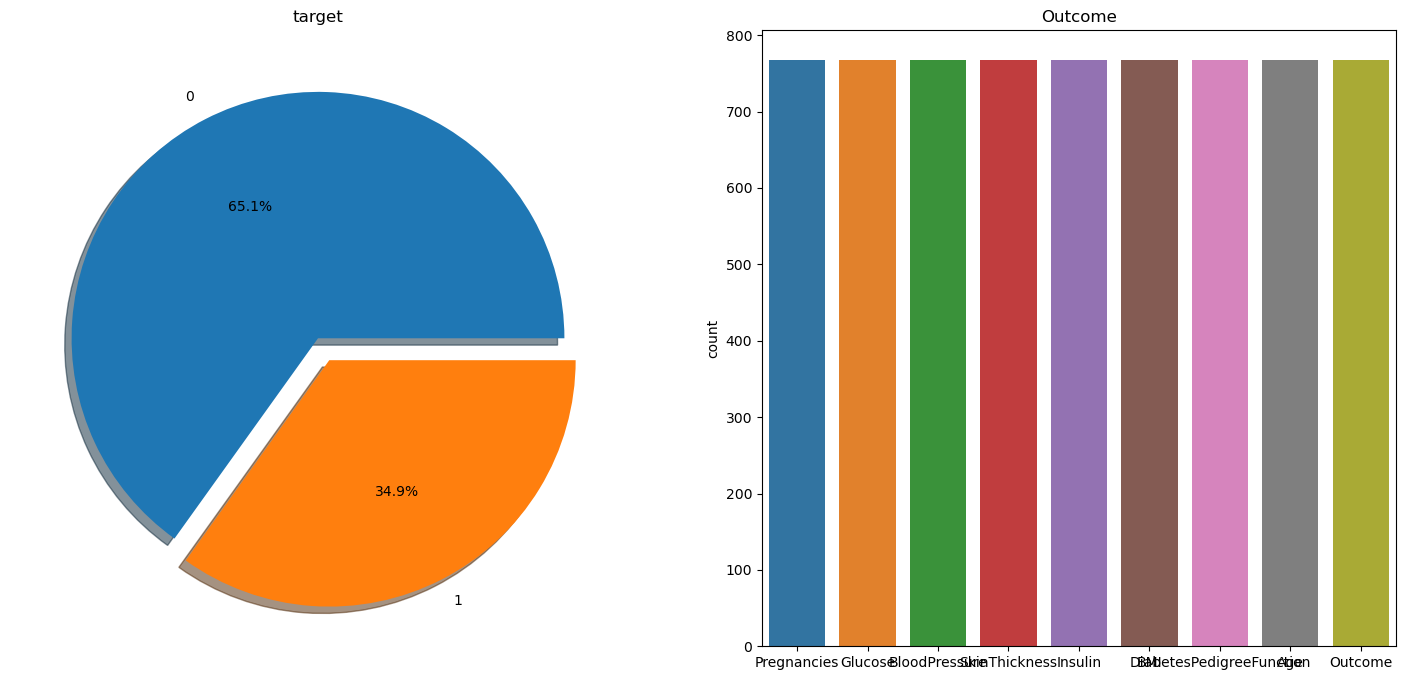

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(data=data)
ax[1].set_title('Outcome')
plt.show()

<Axes: xlabel='Age', ylabel='Insulin'>

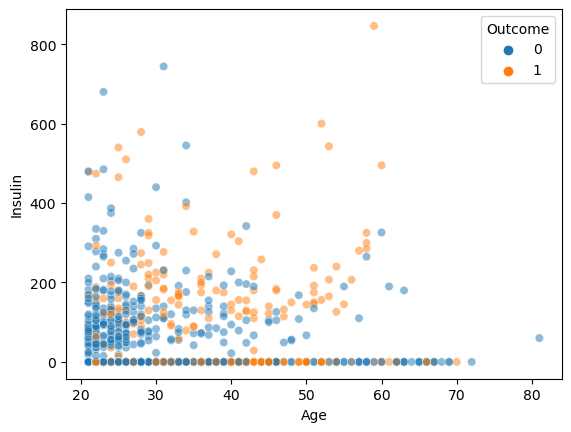

In [19]:
plt.figure(dpi=100)
sns.scatterplot(data=data,x='Age',y='Insulin',hue='Outcome',alpha=0.5)

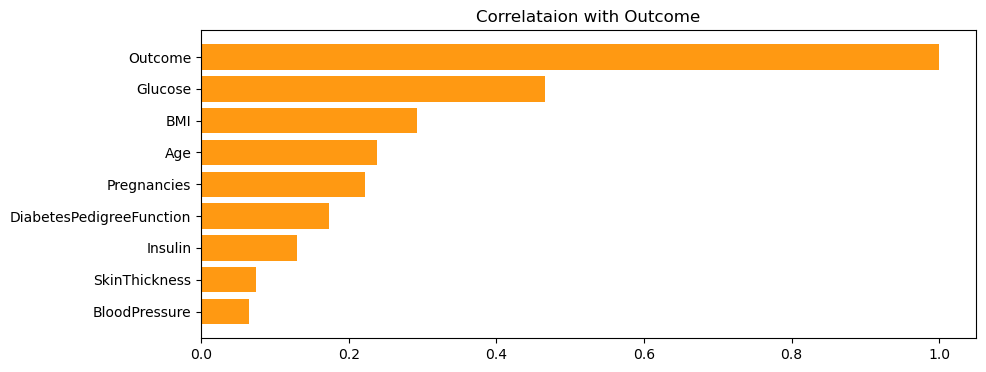

In [20]:
fig = plt.figure(figsize = (10, 4))
outcome_corr = pd.DataFrame(data.corr()['Outcome'].sort_values(ascending = True))
plt.barh(outcome_corr.index, outcome_corr['Outcome'],color="#FF9912")
plt.title('Correlataion with Outcome')
plt.show()

In [21]:
num_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness'
           ,'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# Define the function
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")
    print("***********")

# Call the function for each numerical column
for col in num_col:
    target_summary_with_num(data, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672

***********
            Glucose
Outcome            
0        109.980000
1        141.257463

***********
         BloodPressure
Outcome               
0            68.184000
1            70.824627

***********
         SkinThickness
Outcome               
0            19.664000
1            22.164179

***********
            Insulin
Outcome            
0         68.792000
1        100.335821

***********
               BMI
Outcome           
0        30.304200
1        35.142537

***********
         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500

***********
               Age
Outcome           
0        31.190000
1        37.067164

***********
         Outcome
Outcome         
0            0.0
1            1.0

***********


In [22]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0, 0.5, 'Frequency')

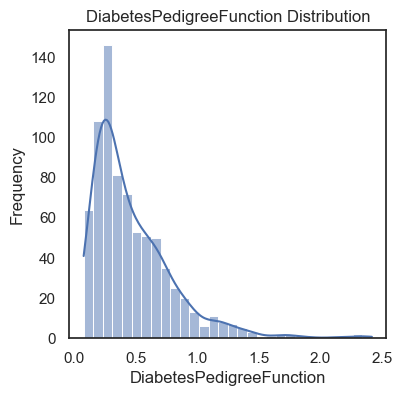

In [23]:
sns.set(style="white")

# Histogram for DiabetesPedigreeFunction
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='DiabetesPedigreeFunction',bins=30, kde=True)
plt.title('DiabetesPedigreeFunction Distribution')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

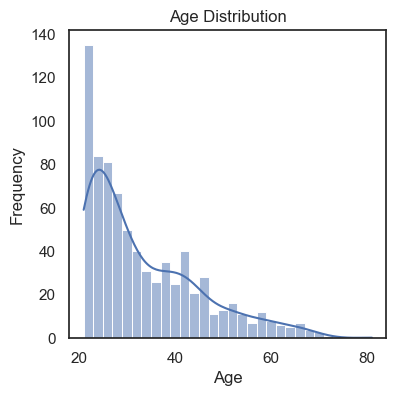

In [24]:
sns.set(style="white")

# Histogram for Age
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Age',bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

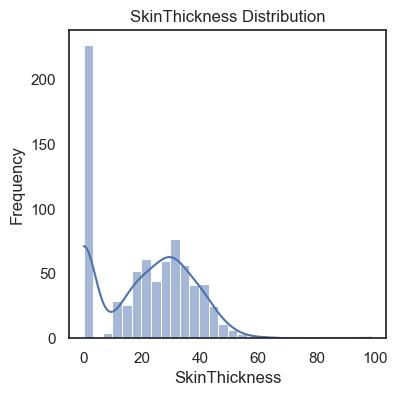

In [25]:
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='SkinThickness',bins=30, kde=True)
plt.title('SkinThickness Distribution')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

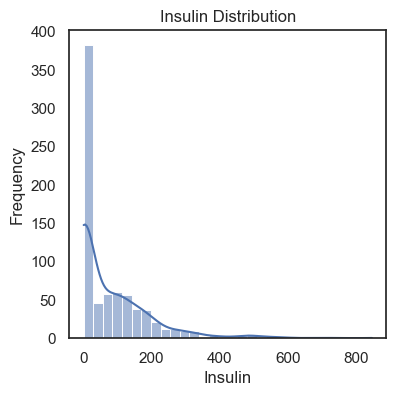

In [26]:
sns.set(style="white")

# Histogram for Insulin
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Insulin',bins=30, kde=True)
plt.title('Insulin Distribution')
plt.xlabel('Insulin')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

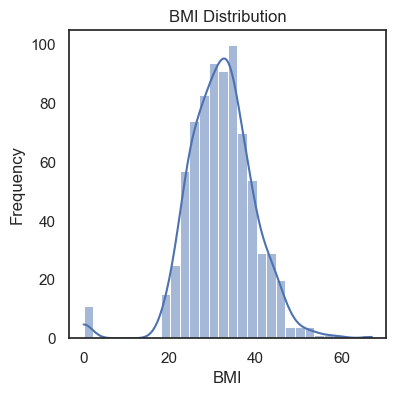

In [27]:
sns.set(style="white")

# Histogram for BMI
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='BMI',bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

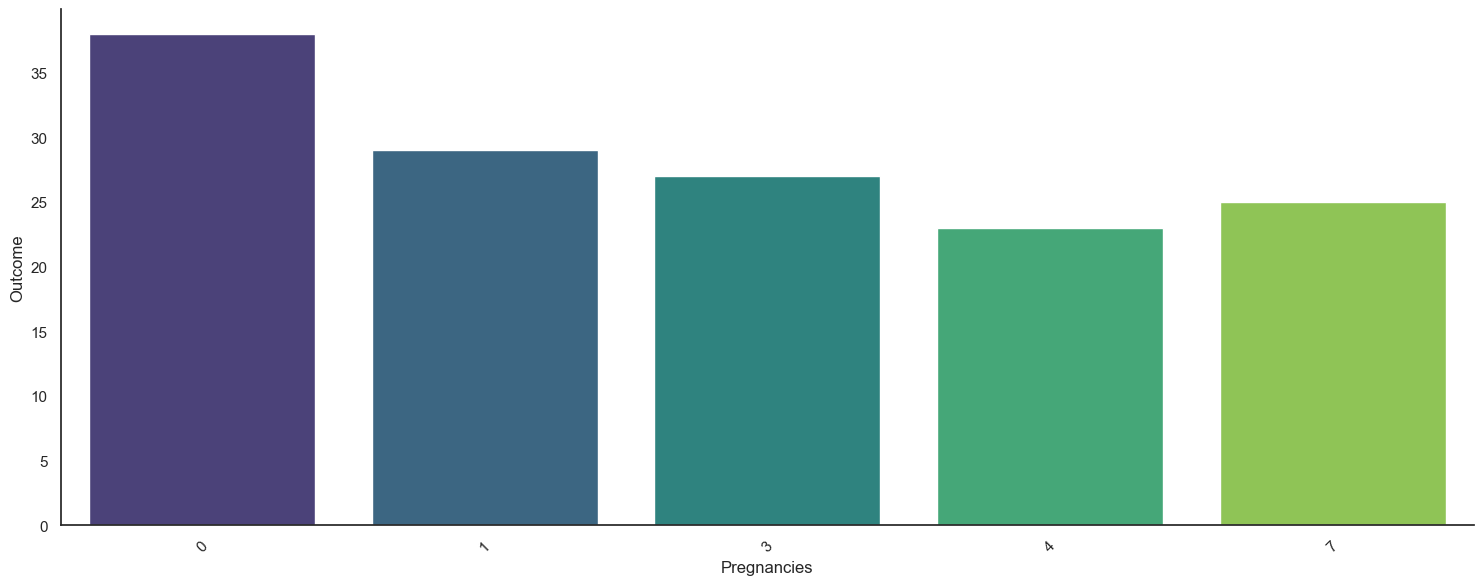

In [28]:
Top=data.groupby("Pregnancies")["Outcome"].sum().reset_index().sort_values("Outcome",ascending=False).head()
sns.catplot(data=Top, x="Pregnancies", y="Outcome", kind="bar", palette="viridis", height=6, aspect=2.5)
            
plt.xticks(rotation=45)
plt.show()


# Outliear

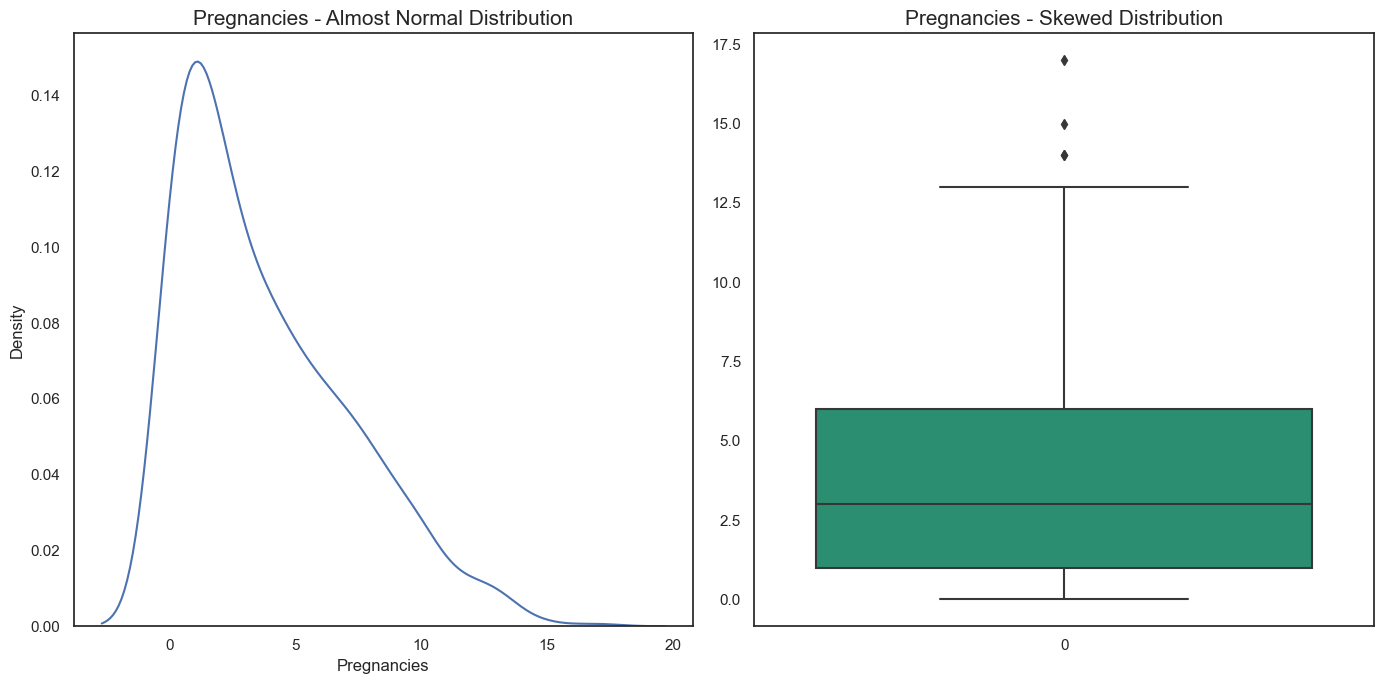

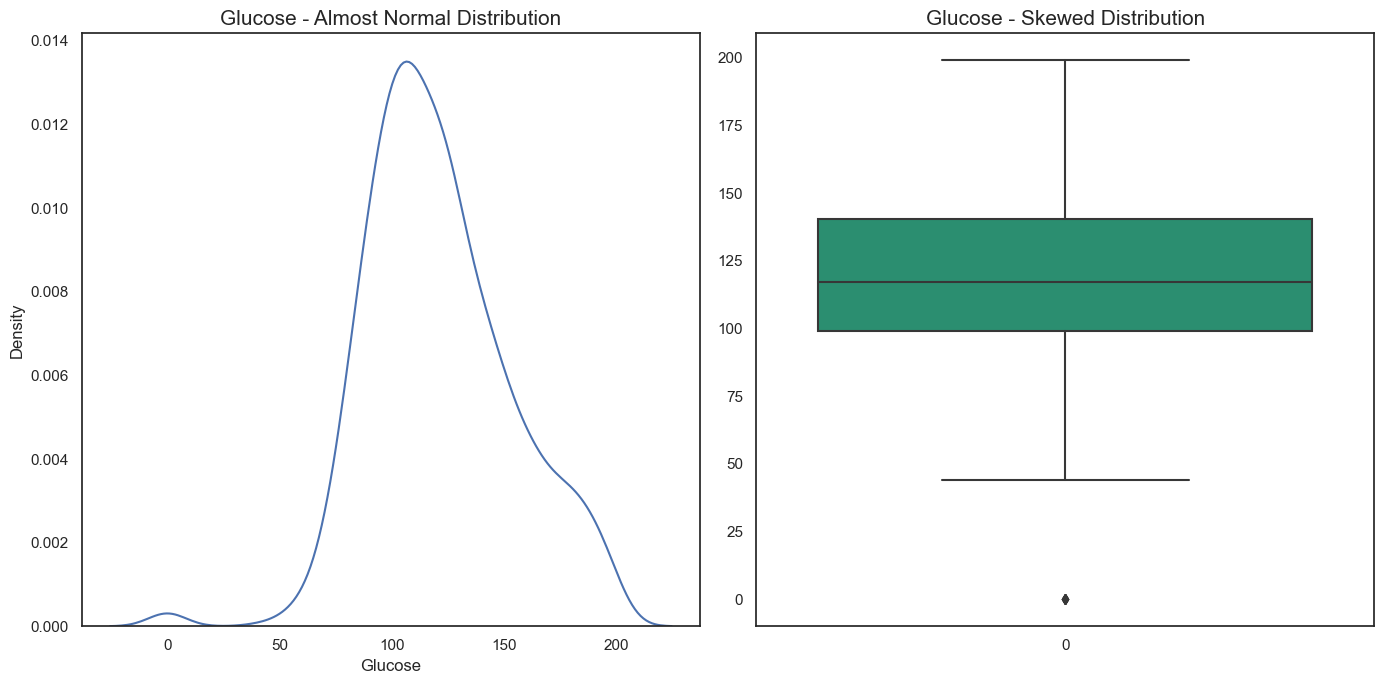

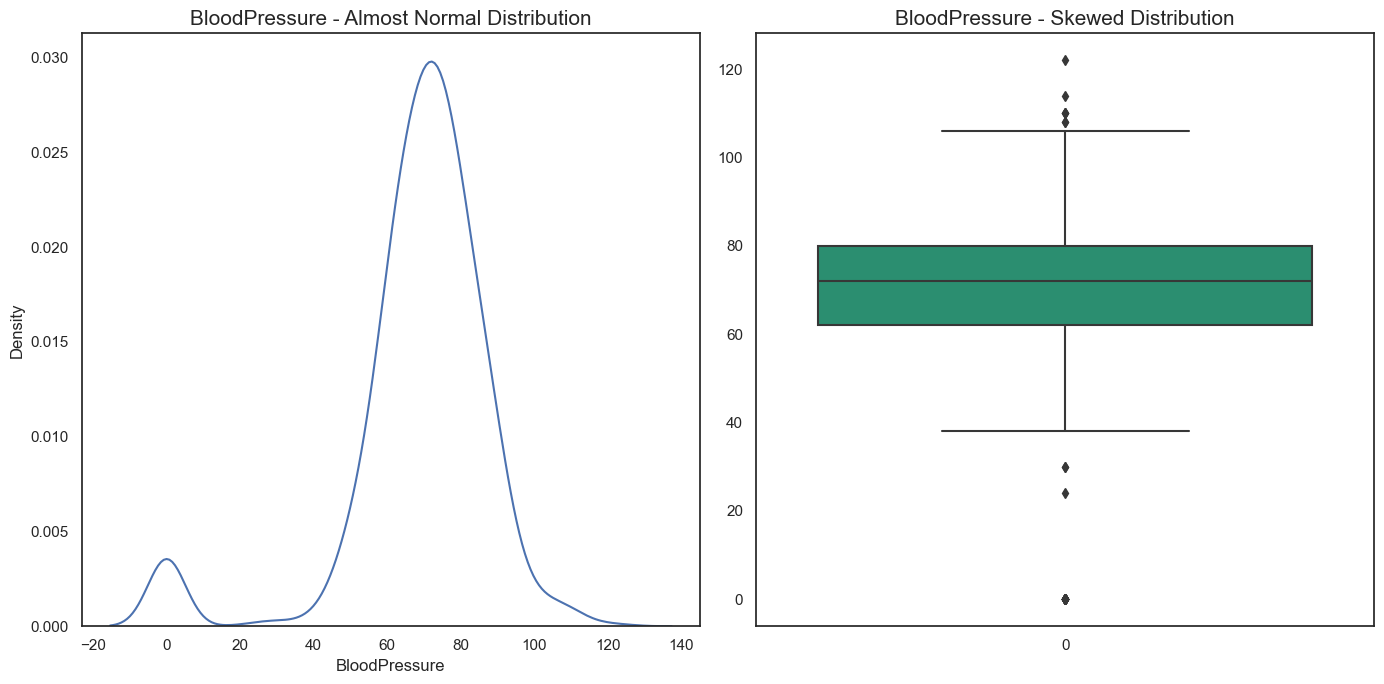

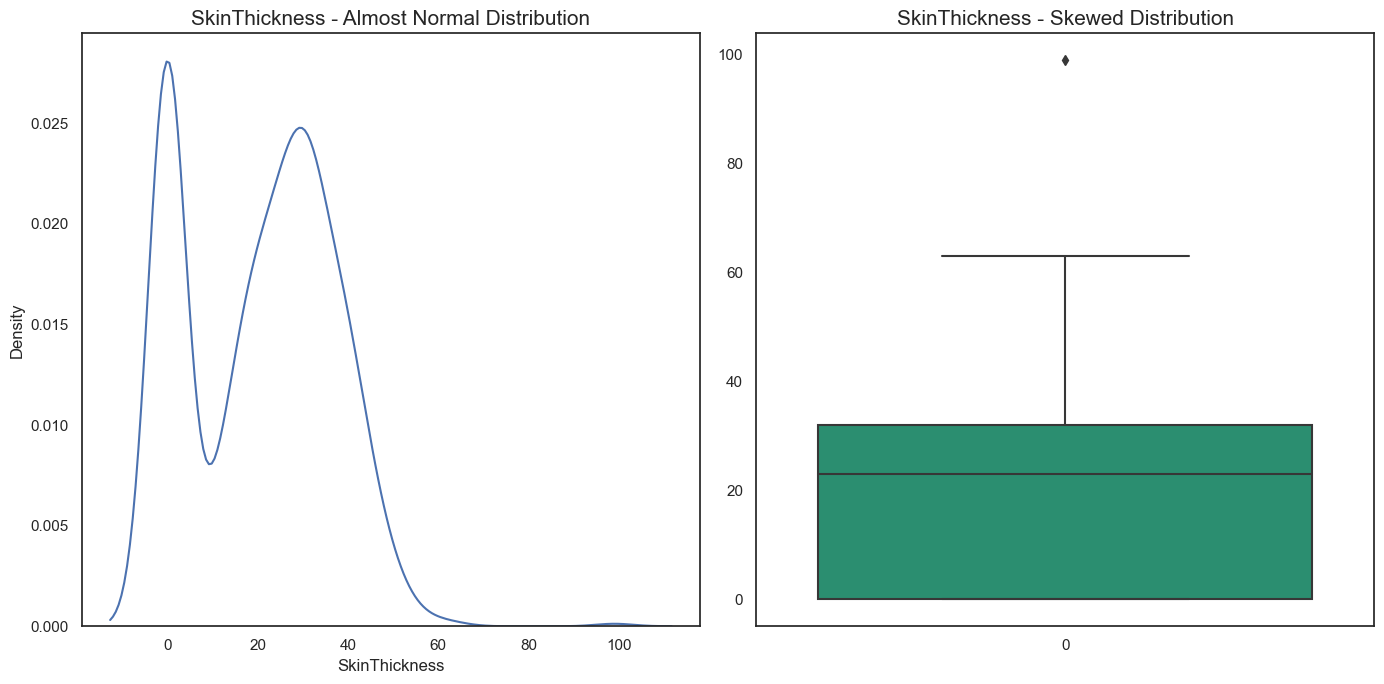

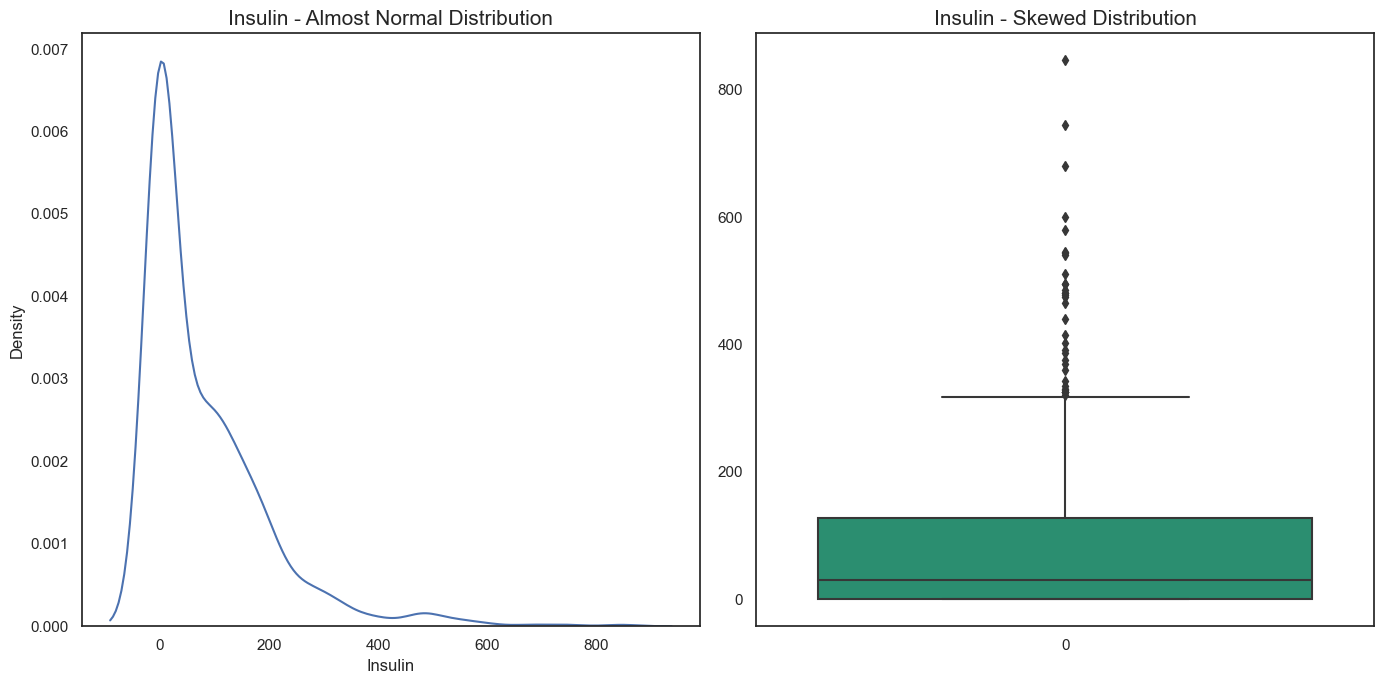

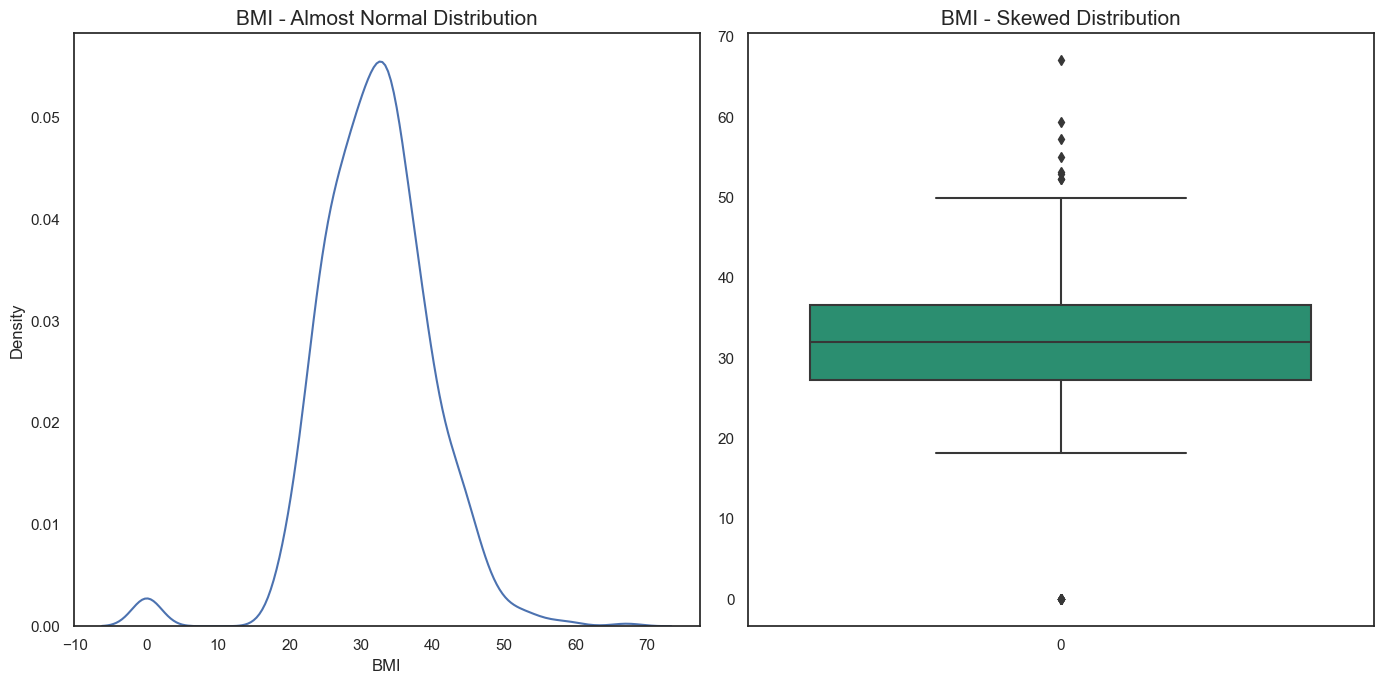

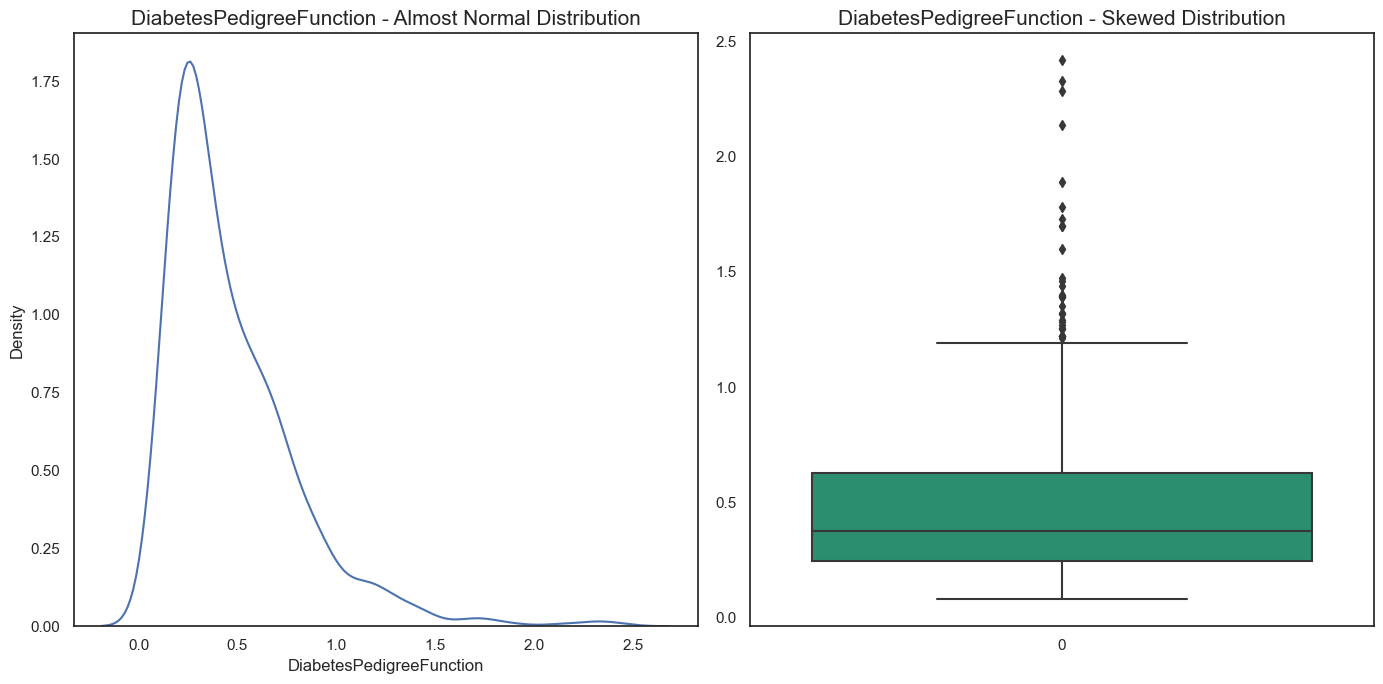

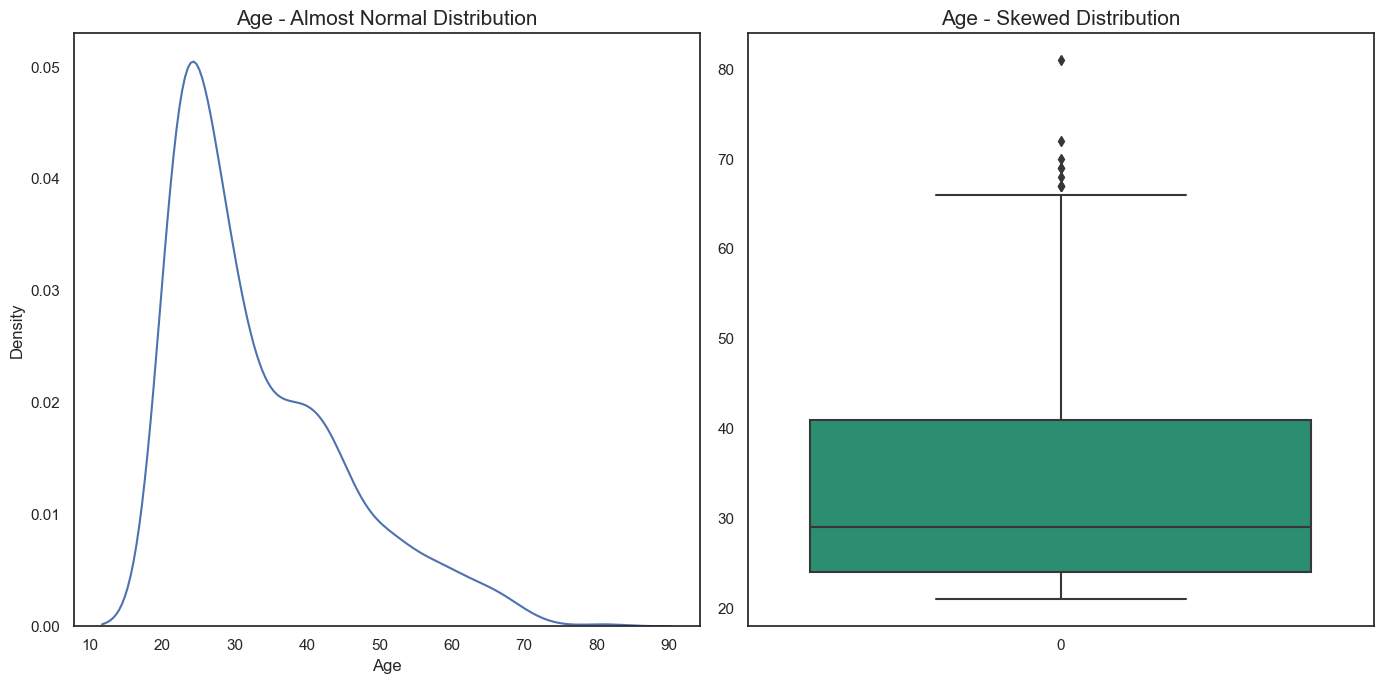

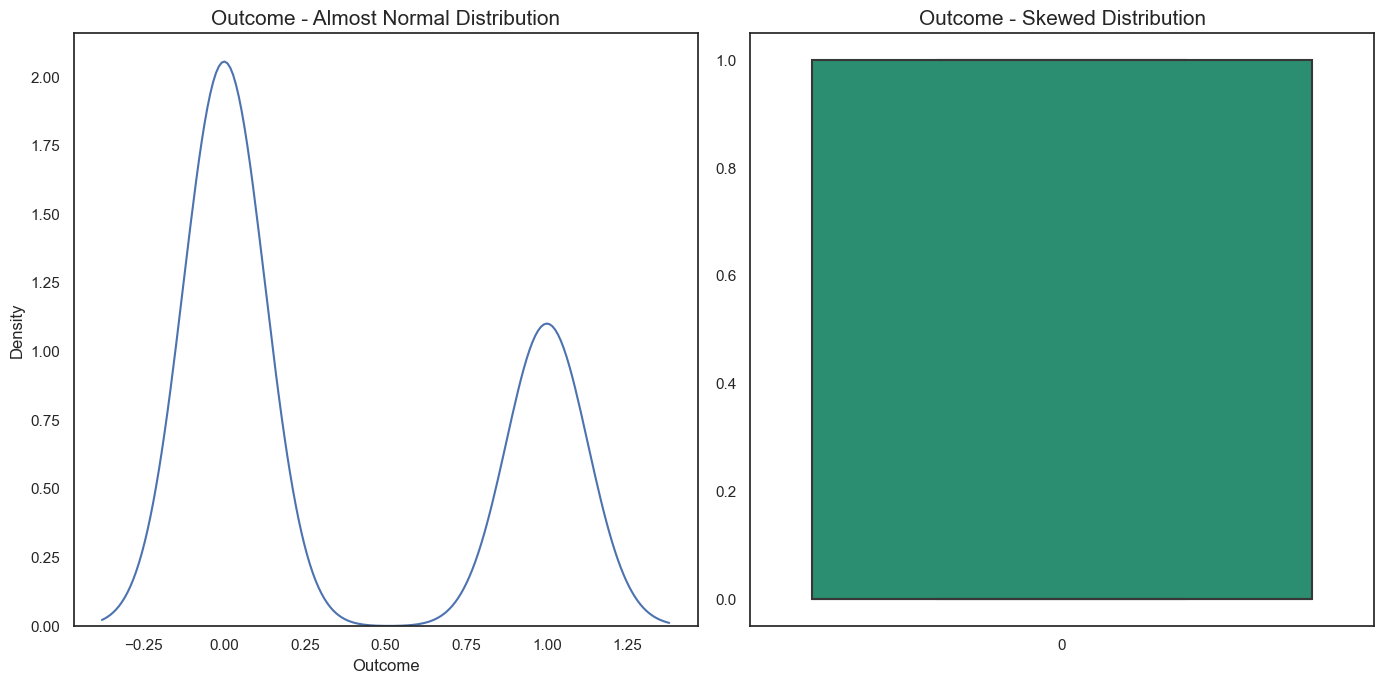

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Loop through all columns
for column in data.columns:
    plt.figure(figsize=(14, 7))
    
    # Subplot 1: Kernel Density Estimation Plot
    plt.subplot(1, 2, 1)
    plt.title(f"{column} - Almost Normal Distribution", fontsize=15)
    sns.kdeplot(data=data[column])
    
    # Subplot 2: Box Plot
    plt.subplot(1, 2, 2)
    plt.title(f"{column} - Skewed Distribution", fontsize=15)
    sns.boxplot(data=data[column], palette="Dark2")
    
    plt.tight_layout()
    plt.show()

# Remove Outliear

In [30]:
num_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness'
           ,'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [31]:
no_outlier = data
for i in num_col:
    lower_limit = data[i].quantile(0.5)
    upper_limit = data[i].quantile(0.95)
    no_outlier[i] = no_outlier[i].clip(lower_limit, upper_limit)

Pregnancies                    Axes(0.125,0.747241;0.133621x0.132759)
Glucose                     Axes(0.285345,0.747241;0.133621x0.132759)
BloodPressure                Axes(0.44569,0.747241;0.133621x0.132759)
SkinThickness               Axes(0.606034,0.747241;0.133621x0.132759)
Insulin                     Axes(0.766379,0.747241;0.133621x0.132759)
BMI                            Axes(0.125,0.587931;0.133621x0.132759)
DiabetesPedigreeFunction    Axes(0.285345,0.587931;0.133621x0.132759)
Age                          Axes(0.44569,0.587931;0.133621x0.132759)
Outcome                     Axes(0.606034,0.587931;0.133621x0.132759)
dtype: object

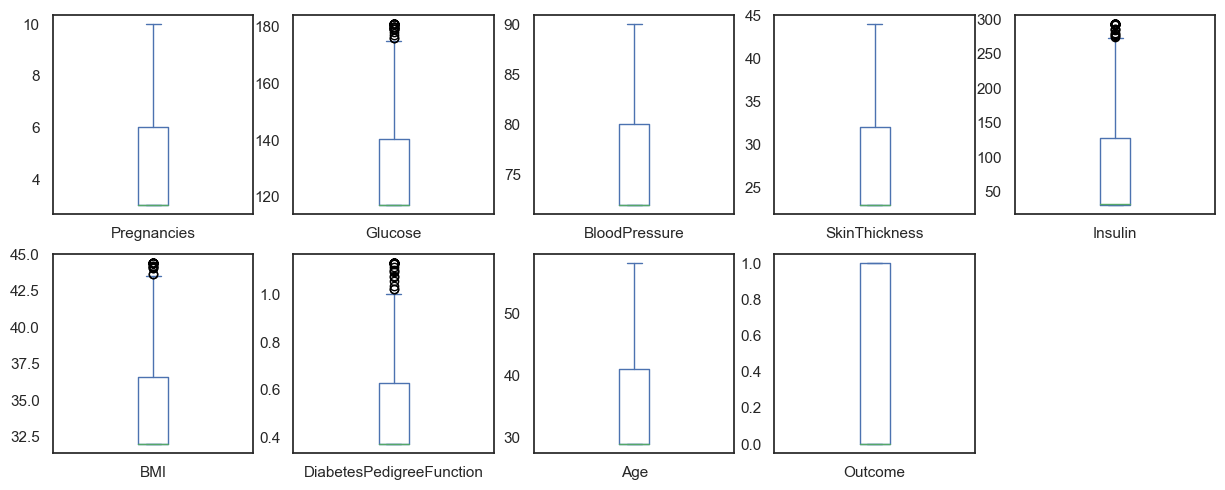

In [32]:
data.plot(kind = "box" , subplots = True , figsize = (15,15) , layout = (5,5))

# Pre-processing

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Spliting

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scaler

In [37]:
Sc=StandardScaler()

In [38]:
X_train_Scaled=Sc.fit_transform(X_train)

In [39]:
X_test_Scaled=Sc.fit_transform(X_test)

In [140]:
#Data Standardization(To convert to range btw zero and one)
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [141]:
standardized_data = scaler.transform(X)

In [142]:
print(standardized_data)

[[ 0.57610142  0.83963249 -0.70992067 ... -0.28740296  0.46282768
   1.62240522]
 [-0.71508309 -0.69064159 -0.70992067 ... -0.70234677 -0.68063317
  -0.48439704]
 [ 1.43689109  2.46863393 -0.70992067 ... -0.70234677  0.66501133
  -0.37351271]
 ...
 [ 0.14570659 -0.49318687 -0.70992067 ... -0.70234677 -0.68063317
  -0.59528137]
 [-0.71508309 -0.24636847 -0.70992067 ... -0.70234677 -0.68063317
   1.28975223]
 [-0.71508309 -0.69064159 -0.70992067 ... -0.70234677 -0.68063317
  -0.70616569]]


In [143]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [144]:
X = data.drop('Outcome' , axis= 1) 
Y = data['Outcome']

# Logistic Regression Model

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
lg = LogisticRegression()

In [147]:
lg.fit(X_train, y_train)

LogisticRegression()

In [148]:
y_pred = lg.predict(X_test)

In [149]:
acc = (lg.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(lg.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 74.12
The accuracy of the Model Train is 76.77


# KNN Model

In [150]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier(n_neighbors=5)

In [153]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [154]:
acc = (knn.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(knn.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 83.27
The accuracy of the Model Train is 69.29


# SVM Model

In [155]:
from sklearn.svm import SVC

In [156]:
svm = SVC()

In [157]:
svm.fit(X_train,y_train)

SVC()

In [158]:
y_pred = svm.predict(X_test)

In [159]:
acc = (svm.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(svm.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 76.26
The accuracy of the Model Train is 72.83


# Decision TreeClassifier

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
dt = DecisionTreeClassifier(max_depth = 5 , max_features= 4)

In [162]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5, max_features=4)

In [163]:
acc = (dt.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(dt.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 82.88
The accuracy of the Model Train is 74.80


<Axes: >

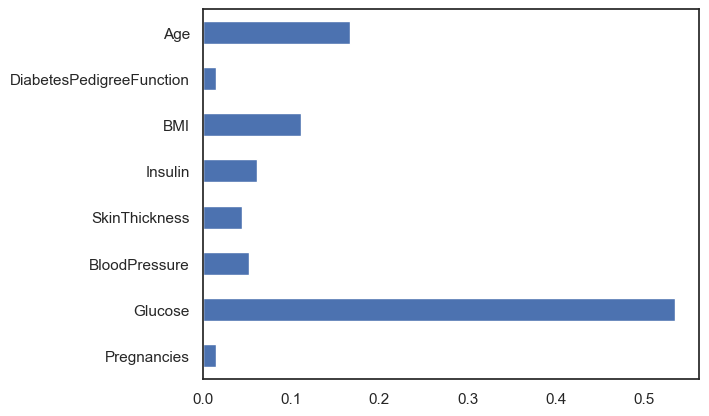

In [164]:
(pd.Series(dt.feature_importances_, index=X.columns).plot(kind='barh')) 

# RandomForest Classifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rf = RandomForestClassifier(n_estimators= 6 , max_depth=8 ,max_features= 7)

In [167]:
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=8, max_features=7, n_estimators=6)

In [168]:
acc = (rf.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(rf.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 95.14
The accuracy of the Model Train is 70.08


# Diabetic Prediction using Ensembling in Original Data

## Spliting

In [169]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [170]:
X = data.drop('Outcome' , axis= 1) 
Y = data['Outcome']

In [171]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size= 0.20, random_state =30)

# xgboost

In [172]:
pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [173]:
from xgboost import XGBClassifier

In [174]:
import xgboost as xgb

In [175]:
xgb = XGBClassifier(missing = 190 , max_depth  = 5 ,  n_estimators  = 6 , learning_rate = 0.4)

In [176]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=190, monotone_constraints=None,
              multi_strategy=None, n_estimators=6, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [177]:
acc = (xgb.score(x_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(xgb.score(x_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 88.11
The accuracy of the Model Train is 77.27


### voting

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [179]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth = 5 , max_features= 4)
clf3 = RandomForestClassifier(max_depth = 5 , max_features= 4)
clf4 = XGBClassifier( max_depth  = 5 ,  n_estimators  = 6 , learning_rate = 0.4)
cl5= KNeighborsClassifier(n_neighbors=5)

In [180]:
v_clf = VotingClassifier(estimators=[('LR' , clf1) , ('DT' , clf2) , ("RF" , clf3) , ("xgb" , clf4) ,("Knn" , cl5)], voting= 'soft')

In [181]:
v_clf.fit(x_train , y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_features=4)),
                             ('RF',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=4)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable...
                                            interaction_constraints=None,
                                            learning_rate=0.4, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None, n_estimators=6,
                                            n_jobs=None, num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('Knn', KNeighborsClassifier())],
                 voting='soft')

In [182]:
acc = (v_clf.score(x_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(v_clf.score(x_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 85.67
The accuracy of the Model Train is 79.22


In [183]:
acc = (v_clf.score(x_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(v_clf.score(x_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 85.67
The accuracy of the Model Train is 79.22


# BaggingClassifier

In [184]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier

In [185]:
bc = BaggingClassifier(n_estimators=150, random_state=2)

In [186]:
bc.fit(x_train,y_train)

BaggingClassifier(n_estimators=150, random_state=2)

In [187]:
y_pred=bc.predict(x_test)

In [188]:
acc = (bc.score(x_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(bc.score(x_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 100.00
The accuracy of the Model Train is 75.97


# Conclusion

# Comparison and Highest Accuracy

The accuracy of the Model Train is 86.99

The accuracy of the Model Train is 80.14

# xgboost


The accuracy of the Model Train is 91.24

The accuracy of the Model Train is 85.02

# RandomForest Classifier


The accuracy of the Model Train is 78.32

The accuracy of the Model Train is 77.79

# Decision TreeClassifier


The accuracy of the Model Train is 80.10

The accuracy of the Model Train is 78.67

# SVM Model

The accuracy of the Model Train is 75.46

The accuracy of the Model Train is 76.91

# KNN Model

The accuracy of the Model Train is 91.91

The accuracy of the Model Train is 82.49

# Logistic Regression Model

The accuracy of the Model Train is 75.57

The accuracy of the Model Train is 77.57

# The Best Accuracy >>>>>>>>>> Bagging

# Evalution Model

### Cross Validations

In [189]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [190]:
acc = (lg.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')
acc =(lg.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {acc:.2f}')

The accuracy of the Model Train is 74.12
The accuracy of the Model Train is 76.77


In [191]:
y_pred=lg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [192]:
from sklearn.metrics import confusion_matrix, classification_report

In [193]:
con=confusion_matrix(y_test,y_pred)
con

array([[149,  19],
       [ 40,  46]], dtype=int64)

In [194]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold , cross_val_score

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

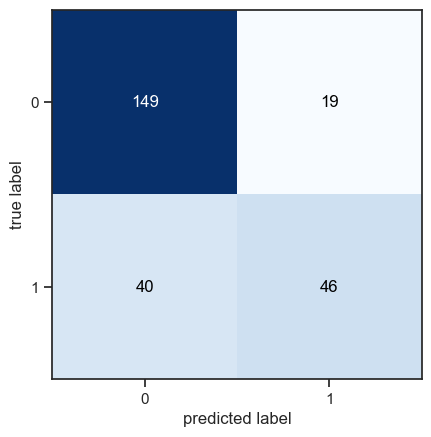

In [196]:
plot_confusion_matrix(con)

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       168
           1       0.71      0.53      0.61        86

    accuracy                           0.77       254
   macro avg       0.75      0.71      0.72       254
weighted avg       0.76      0.77      0.76       254



In [198]:
# Create a KFold object
K_fold = KFold(n_splits=5, random_state=42, shuffle=True)

# Create a DecisionTreeClassifier (replace with your chosen classifier)
dt_classifier = DecisionTreeClassifier()

# Specify the scoring metric
scoring = "accuracy"

# Perform cross-validation and compute scores
scores = cross_val_score(dt_classifier, X, y, cv=K_fold, scoring=scoring)

print(scores)

[0.64285714 0.66883117 0.66883117 0.66666667 0.70588235]


In [199]:
round(np.mean(scores)*100,2)

67.06

# Implement Neural Network Model To Compare with Traditional Model

In [200]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


In [202]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 256)               2304      
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_82 (Dense)            (None, 256)               65792     
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_83 (Dense)            (None, 1)                 257       
                                                                 
Total params: 68353 (267.00 KB)
Trainable params: 68353 (267.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Define the input shape
input_shape = (8,)  # Modify this with the actual input shape

# Define the model architecture with increased complexity and regularization
model = Sequential([
    Dense(800, activation='relu', input_shape=input_shape),
    Dropout(0.5),  # Dropout layer for regularization
    Dense(400, activation='relu'),
    Dropout(0.5),  # Dropout layer for regularization
    Dense(128, activation='sigmoid'),  # Additional hidden layer
    Dropout(0.5),  # Dropout layer for regularization
    Dense(64, activation='tanh'),  # Additional hidden layer
    Dropout(0.5),  # Dropout layer for regularization
    Dense(1, activation='sigmoid')
])

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.001)  # Adjusted learning rate
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with increased epochs and early stopping
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/200
33/33 [==============================] - 1s 12ms/step - loss: 0.7550 - accuracy: 0.5934 - val_loss: 0.7180 - val_accuracy: 0.6614
Epoch 2/200
33/33 [==============================] - 0s 6ms/step - loss: 0.7461 - accuracy: 0.5953 - val_loss: 0.6595 - val_accuracy: 0.6614
Epoch 3/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7246 - accuracy: 0.6109 - val_loss: 0.6445 - val_accuracy: 0.6614
Epoch 4/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7435 - accuracy: 0.5700 - val_loss: 0.6469 - val_accuracy: 0.6614
Epoch 5/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7383 - accuracy: 0.5798 - val_loss: 0.6596 - val_accuracy: 0.6614
Epoch 6/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7152 - accuracy: 0.5934 - val_loss: 0.6397 - val_accuracy: 0.6614
Epoch 7/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7399 - accuracy: 0.5623 - val_loss: 0.6538 - val_accuracy: 0.6614
Epoch 8/200


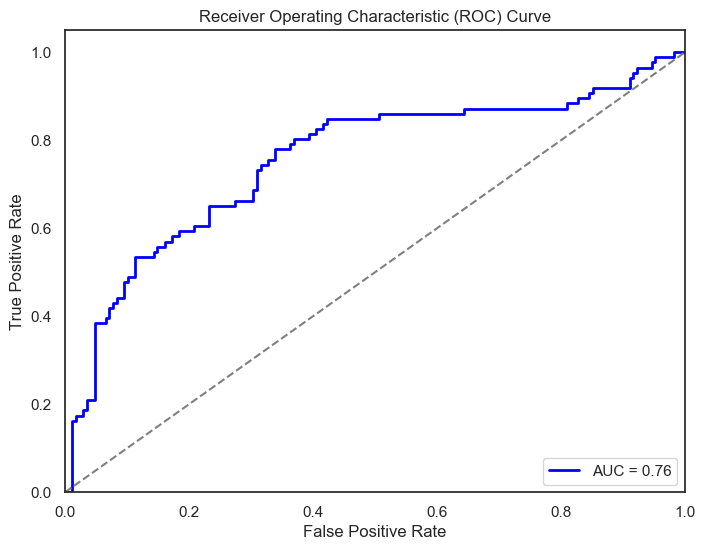

In [204]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Fit the classifier
classifier.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_pred_probs = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [217]:

import numpy as np
sn# Assume scaler and classifier are defined elsewhere

input_data = (10, 122, 78, 31, 0, 27.6, 0.512, 45)

# Convert input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Perform prediction
prediction = classifier.predict(std_data)

# Output prediction result
if prediction == 0:
    print('The person is diabetic.')
else:
    print('The person is not diabetic.')

# Calculate and print accuracy
accuracy = round(0.98635889 * 100, 2)  # Multiply by 100 to convert to percentage
print('Accuracy:', accuracy, '%')


The person is diabetic.
Accuracy: 98.64 %
